<h1  style="text-align: center" class="list-group-item list-group-item-action active">Department of Computing</h1><a id = "1" ></a>
<h1  style="text-align: center" class="list-group-item list-group-item-action active">Academic Year 2022/2023</h1><a id = "1" ></a>

<h1  style="text-align: center" class="list-group-item list-group-item-action active">Dissertation</h1><a id = "1" ></a>
<h1  style="text-align: center" class="list-group-item list-group-item-action active">A Comparative Study for Energy Price Prediction Using Different Machine Learning Algorithms </h1><a id = "1" ></a>


Student Name : **Beksy Saji George**
 
Student ID : **C00290800**

Programme title : **Masters in Data Science**

Programme code : **KCDAR_M_Y5**

Module title : **DISSC5201: Dissertation**

Supervisior's name : **Dr.Lei Shi**

Submission date : **16/08/2023**

## **1. Introduction**

In the current energy sector, it is crucial to have  an understanding and an ability to estimate future energy prices. Due to fluctuations in energy consumption and other price-influencing factors, accurate forecasting is crucial for large businesses and regular consumers. This study looks at different machine learning methods to identify the best model for predicting the energy prices .

The objective is to conduct a comparative analysis in order determine the optimal performance of these algorithms and  to find the reason behind its effectiveness. Moreover,it will ultimately make easier for people to take better decisions in the future about how much energy they utilize and how much money they should spent.

## **2. Research Question**

What is the best machine learning model for predicting future hourly electricity costs based on energy and weather features?

Objectives:

1. To identify energy and climatic conditions have any influence on hourly power prices.

2. To build distinct machine learning models that are capable of predicting future hourly electricity prices depending on the determined energy and weather factors.

3. To find out how well the models work in terms of their accuracy, mean absolute error, mean squared error, and R-squared.

4. To determine the effect of feature engineering and data preparation methods on the predictive performance of the models.

5. To anlayse the results of the model evaluations to generate key insights and recommendations to the consumers for managing power costs.

## **3. Data Description**

The dataset utilised in this research is taken from  Kaggle,Hourly energy demand generation and weather -https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather.  The dataset is about 26.19 MB which consist of 2 datasets such as weather.csv and energy.csv files. The collection includes energy generation and weather feature informations. There are 45 variables in the dataset, including one target variable and 44 predictor variables. The "price actual" is the target variable, which contains the historical energy prices. 

Below are the feature descriptions-

1.	 Generation biomass:  Energy produced from biomass energy sources, such as organic materials obtained from plants or animals, is known as biomass generation.
2.	generation of fossil brown coal/lignite: Energy produced from low-grade coal varieties such as brown coal or lignite.
3.	generating fossil coal-derived gas:  Energy produced from gas derived from fossil coal.
4.	generation fossil gas: The production of energy utilizing a fossil fuel, such as natural gas.
5.	generation fossil hard coal:  Production of energy with hard coal, premium coal.
6.	generation of fossil oil:   The production of fossil energy.
7.	Generation fossil oil shale:  Energy produced from oil shale, a sedimentary rock that contains organic material.
8.	generation fossil peat: Energy produced from peat, an organic substance with high water content.
9.	generation geothermal:  Energy produced by harnessing heat from the planet's interior.
10.	generation hydro pumped storage aggregated: Hydroelectricity, pumped storage energy produced by hydropower facilities with pumped storage, combined.
11.	generation hydro-pumped storage consumption:  Energy generated through hydropower facilities with pumped storage while they are operating is referred to as generating hydro-pumped storage consumption.
12.	generation hydro run-of-river and poundage:  Energy generation from run-of-river hydropower plants without water storage.
13.	generation hydro water reservoir:  Energy produced by hydropower plants with water reservoirs.
14.	generation marine: Energy produced by marine energy sources like tides and waves.
15.	generation nuclear:  Nuclear power facilities that produce energy.
16.	generation other:   Energy produced using other, unidentified energy sources.
17.	generation of other renewable: The electricity from several other renewable energy sources is not specifically specified, yet it is produced.
18.	generation solar: The process of producing electricity using solar energy sources, such as solar photovoltaic panels.
19.	generation waste: The process of generating power from waste by converting it to energy.
20.	generation wind offshore: The electricity produced by offshore wind farms.
21.	generation wind onshore: Onshore wind generation is the process by which onshore wind farms produce electricity.
22.	forecast solar day ahead: The anticipated solar energy output for the following day.
23.	forecast wind offshore day ahead: A forecast for offshore wind energy output.
24.	forecast wind onshore day ahead: The expected amount of onshore wind energy production.
25.	total load forecast: The anticipated total demand for electricity over a specific time frame.
26.	total load actual: The total amount of electricity demand for a specific period.
27.	price day ahead: The forecasted electricity price for the following day.
28.	price actual: The actual electricity price for a specific period.
29.	dt_iso: The timestamp in ISO format.
30.	city_name: The name of the city associated with the weather observations.
31.	temp: The temperature at the time of observation.
32.	temp_min: The minimum temperature measured during the observation period.
33.	temp_max: The maximum temperature measured during the observation period.
34.	pressure: The atmospheric pressure at the time of observation.
35.	humidity: The relative humidity at the time of observation.
36.	wind_speed: The wind speed at the time of observation.
37.	wind_deg: The wind direction at the time of observation.
38.	rain_1h: The amount of rainfall recorded in the past hour.
39.	rain_3h: The amount of rainfall recorded in the past three hours.
40.	snow_3h: The amount of snowfall observed in the past three hours.
41.	clouds_all: The cloud cover percentage at the time of observation.
42.	weather_id: A numerical code representing the particular weather condition.
43.	weather_main: The main classification of the weather condition.
44.	weather_description: A detailed description of the weather condition.
45.	weather_icon: An icon that depicts the current weather



## **4. Data Preprocessing**

### **4.1 Data Cleaning**

Firstly we will import the required libraries and load the dataset.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,mean_squared_log_error
from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import LSTM, Dense



In [153]:
energy = pd.read_csv('energy_dataset.csv', parse_dates=['time'])

In [154]:
weather = pd.read_csv('weather_features.csv', parse_dates=['dt_iso'])

Here we merge the two datasets and starts with the analysis to find out any misssing values,duplicate rows,and removing the unnecessary fields for effective processing of the data.

In [155]:
# Merging  the  two datasets "energy" and "weather" based on the 'time' column in energy dataset and 'dt_iso' in weather features dataset.
merged_data = pd.merge(energy, weather, left_on='time', right_on='dt_iso')

# Display the first few rows of the merged dataset
merged_data.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [156]:
# Checking for any missing or null values in the dataset
merged_data.isnull().sum()

time                                                0
generation biomass                                 95
generation fossil brown coal/lignite               90
generation fossil coal-derived gas                 90
generation fossil gas                              90
generation fossil hard coal                        90
generation fossil oil                              95
generation fossil oil shale                        90
generation fossil peat                             90
generation geothermal                              90
generation hydro pumped storage aggregated     178396
generation hydro pumped storage consumption        95
generation hydro run-of-river and poundage         95
generation hydro water reservoir                   90
generation marine                                  95
generation nuclear                                 85
generation other                                   90
generation other renewable                         90
generation solar            

In [157]:
# Dropping the unwanted columns 
merged_data = merged_data.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
                                            'generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal',
                                            'weather_icon','weather_main','weather_id','weather_description','dt_iso'], axis=1)

merged_data.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0


In [158]:
# Checking for any duplicate rows in the dataset
merged_data.duplicated().sum()


3076

Since there are 3076 duplicate rows in the dataset,we will analyse whether dropping those rows is really required or not.Since doesn't affect the result of the total dataset,we remove the duplicate rows.This is done to avoid the problem of multicollinearity and to improve the model.

In [159]:
# Remove duplicate rows
merged_data = merged_data.drop_duplicates()
merged_data.duplicated().sum()



0

In [160]:
# Checking the data type of all columns to convert,if required.
merged_data.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind offshore                       float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast w

In [161]:
# checking the structure of 'time' field.
merged_data['time'].head()



0    2015-01-01 00:00:00+01:00
1    2015-01-01 00:00:00+01:00
2    2015-01-01 00:00:00+01:00
3    2015-01-01 00:00:00+01:00
4    2015-01-01 00:00:00+01:00
Name: time, dtype: object

In [162]:
# Convert 'time' and 'dt_iso' columns to datetime type with timezone information
merged_data['time'] = pd.to_datetime(merged_data['time'], utc=True)
merged_data.dtypes


time                                           datetime64[ns, UTC]
generation biomass                                         float64
generation fossil brown coal/lignite                       float64
generation fossil gas                                      float64
generation fossil hard coal                                float64
generation fossil oil                                      float64
generation hydro pumped storage consumption                float64
generation hydro run-of-river and poundage                 float64
generation hydro water reservoir                           float64
generation marine                                          float64
generation nuclear                                         float64
generation other                                           float64
generation other renewable                                 float64
generation solar                                           float64
generation waste                                           flo

In [163]:
#Dropping any null values present in the dataset.
merged_data = merged_data.dropna()  

In [164]:
# Identify rows where pressure is equal to the max value
merged_data['pressure'].max()


1008371

Here the 'pressure' variable shows a clear outlier, with a value near or above 1,000,000 hPa. This is far beyond normal atmospheric pressure values, which typically range from about 980 to 1050 hPa.So we will try to remove them

In [165]:
# Remove entries where pressure is above 1050 hPa
merged_data = merged_data[merged_data['pressure'] <= 1050]
merged_data.shape


(174673, 35)

In [166]:
merged_data.to_csv('cleaned_dataset.csv', index=False)

In [167]:
new_data=pd.read_csv('cleaned_dataset.csv')

In [168]:
new_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,...,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0


### **4.2 Detecting Outliers**

An outlier is  a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.Anything that is three standard deviations away from the mean is considered an outlier.We will have an Upper Limit and a Lower Limit for each column. If the value of the column is less than the Lower Limit or more than the Upper Limit, it is considered as an outlier.

In this section, we create an empty dictionary to hold the columns and their respective number of outliers in the dataset.To discover outliers, we had applied the IQR approach.We first computed the IQR for each column, followed by the top and lower limitsof that column.It is an outlier if the value of the column is less than the lower limit or more than the upper limit.So we have placed the outliers in a dictionary and then return the fields in key- values .Otherwise, we'll provide an empty list.

In [169]:
# Checking for outliers using the Interquartile Range (IQR) method
outliers = {}

for col in new_data.columns:
    if pd.api.types.is_numeric_dtype(merged_data[col]):
        Q1 = new_data[col].quantile(0.25)
        Q3 = new_data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        outlier_count = ((new_data[col] < lower_bound) | (new_data[col] > upper_bound)).sum()
        outliers[col] = outlier_count

outliers


{'generation biomass': 299,
 'generation fossil brown coal/lignite': 0,
 'generation fossil gas': 10890,
 'generation fossil hard coal': 0,
 'generation fossil oil': 1201,
 'generation hydro pumped storage consumption': 18746,
 'generation hydro run-of-river and poundage': 0,
 'generation hydro water reservoir': 1713,
 'generation marine': 0,
 'generation nuclear': 355,
 'generation other': 6301,
 'generation other renewable': 15,
 'generation solar': 0,
 'generation waste': 1630,
 'generation wind offshore': 0,
 'generation wind onshore': 1894,
 'forecast solar day ahead': 0,
 'forecast wind onshore day ahead': 2187,
 'total load forecast': 0,
 'total load actual': 0,
 'price day ahead': 4178,
 'price actual': 3498,
 'temp': 209,
 'temp_min': 153,
 'temp_max': 409,
 'pressure': 11197,
 'humidity': 20,
 'wind_speed': 2372,
 'wind_deg': 0,
 'rain_1h': 17320,
 'rain_3h': 1828,
 'snow_3h': 256,
 'clouds_all': 0}

Next, we checks for any negative values in the dataset columns and apply log transformation to all numeric columns.

In [170]:
# Check if there are any negative values in the numeric columns of the dataset
(new_data.select_dtypes(include=[np.number]) < 0).sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead     

In [171]:
# Applying log transformation method to all numeric columns
for col in new_data.columns:
    if pd.api.types.is_numeric_dtype(new_data[col]):
        new_data[col] = np.log1p(new_data[col])

new_data.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,5.603870,5.603870,6.909753,4.356709,0.693147,4.143135,0.0,0.0,0.0,0.0
1,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,5.592199,5.592199,6.879356,4.158883,0.693147,5.736572,0.0,0.0,0.0,0.0
2,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,5.600853,5.600853,6.944087,4.584967,0.000000,5.424950,0.0,0.0,0.0,0.0
3,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,5.644121,5.644121,6.943122,4.615121,2.079442,4.077537,0.0,0.0,0.0,0.0
4,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,5.614496,5.614496,6.946976,4.330733,0.693147,3.091042,0.0,0.0,0.0,0.0


In [172]:
numeric_columns = new_data.select_dtypes(include=[np.number]).columns.tolist()
log_transformed_data = new_data[numeric_columns].apply(lambda x: np.log1p(x))

### **4.3 Feature Generation**



Feature generation, or feature engineering, is essential to creating good machine learning models. It uses existing data to create additional variables or features to improve the model's learning and prediction abilities.

In this electricity price prediction study, feature generation was crucial. The dataset had 'time'. Analyzing this attribute into usable elements was necessary to fully use time-series data. By converting 'time' to datetime, many new features were extracted: 'hour', 'day_of_week','month', and 'year'. The detailed method revealed complex periodic trends, revealing electricity costs' cyclical nature.

Also, the study highlighted the particular characteristics of business-hour electricity usage. As most businesses operate between 9 a.m. and 5 p.m. on weekdays, 'business_hour' was cleverly created to capture this time. This distinction is crucial because commercial operations affect electricity demand and cost.

In [173]:
# Converting 'time' column to datetime
new_data['time'] = pd.to_datetime(new_data['time'], utc=True)

# Created new time-based features like 'hour','day_of_week','month','year' derived from 'time' feature.
new_data['hour'] = new_data['time'].dt.hour
new_data['day_of_week'] = new_data['time'].dt.dayofweek
new_data['month'] = new_data['time'].dt.month
new_data['year'] = new_data['time'].dt.year

# Defining business hours as from 9 a.m. to 5 p.m., Monday to Friday
new_data['business_hour'] = ((new_data['day_of_week'] >= 0) & (new_data['day_of_week'] <= 4) & (new_data['hour'] >= 9) & (new_data['hour'] < 17)).astype(int)


### **4.4 Splitting the data into train and test**

We will now split the data into train and test.We will use the train_test_split() function to split the data into train and test.We will use 80% of the data for training and 20% of the data for testing.As we know that our target variable is "price actual",we will have to drop in the following steps.Before that, we define a proportion of data to be used for testing and identifies the index to split the data.Accordingly,we will split the data into train and test respectively.

In [174]:
# Spliting the data into training and test sets based on the split index
test_ratio = 0.2
split_idx = int(len(new_data) * (1 - test_ratio))

train = new_data.loc[:split_idx].copy()
test = new_data.loc[split_idx:].copy()

train.shape, test.shape


((139739, 40), (34935, 40))

In [175]:
# Identifying non-numerical columns in the dataset.
non_numerical_cols = train.select_dtypes(include=['object', 'datetime64[ns, UTC]']).columns
non_numerical_cols


Index(['time', 'city_name'], dtype='object')

### **4.5 Encoding Categorical Variables**

The process of turning categorical values (variables that reflect categories or groups) into a numerical representation that can be utilised by machine learning algorithms is referred to as categorical variable encoding. Because most machine learning algorithms deal with numerical data, categorical variables must be encoded in order to be included in the study.

Here we use one-hot encoding on the 'city_name' column using the get_dummies() function.

In [176]:
train = pd.get_dummies(train, columns=['city_name'])
test = pd.get_dummies(test, columns=['city_name'])


In [177]:
boolean_columns = ['city_name_ Barcelona', 'city_name_Bilbao', 'city_name_Madrid','city_name_Seville','city_name_Valencia']  

for col in boolean_columns:
    train[col] = train[col].astype(bool).astype(int)
    test[col] = test[col].astype(bool).astype(int)
    
train.head()       


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,...,hour,day_of_week,month,year,business_hour,city_name_ Barcelona,city_name_Bilbao,city_name_Madrid,city_name_Seville,city_name_Valencia
0,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,23,2,12,2014,0,0,0,0,0,1
1,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,23,2,12,2014,0,0,0,1,0,0
2,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,23,2,12,2014,0,0,1,0,0,0
3,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,23,2,12,2014,0,1,0,0,0,0
4,2014-12-31 23:00:00+00:00,6.104793,5.799093,8.485703,8.480944,5.09375,6.761573,6.958448,7.549609,0.0,...,23,2,12,2014,0,0,0,0,1,0


### **4.6 Feature Scaling**

Before training machine learning models, it is essential to make sure that the features have the same scale. Scale differences between features can significantly impact model predictions. 

The scaling features omit time-related columns, target column 'price actual', and one-hot encoded column 'city_names'. The MinMaxScaler is used to scale features to a range of values, usually zero to one. The fit_transform method computes the minimum and maximum values for the training data, which are scaled. The transform technique applies the same scaling parameters on test data to ensure consistency.

In [178]:
# we define the features to scale by excluding 'time', 'price actual', and the one-hot encoded columns
features_to_scale = [feature for feature in train.columns if feature not in ['time', 'price actual', 'city_name_Barcelona', 'city_name_Bilbao', 'city_name_Madrid', 'city_name_Seville', 'city_name_Valencia']]

scaler = MinMaxScaler()

train[features_to_scale] = scaler.fit_transform(train[features_to_scale])
test[features_to_scale] = scaler.transform(test[features_to_scale])

train.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,...,hour,day_of_week,month,year,business_hour,city_name_ Barcelona,city_name_Bilbao,city_name_Madrid,city_name_Seville,city_name_Valencia
0,2014-12-31 23:00:00+00:00,0.956086,0.839505,0.449671,0.93907,0.833777,0.803309,0.91916,0.825328,0.0,...,1.0,0.333333,1.0,0.0,0.0,0.0,0,0,0,1
1,2014-12-31 23:00:00+00:00,0.956086,0.839505,0.449671,0.93907,0.833777,0.803309,0.91916,0.825328,0.0,...,1.0,0.333333,1.0,0.0,0.0,0.0,0,1,0,0
2,2014-12-31 23:00:00+00:00,0.956086,0.839505,0.449671,0.93907,0.833777,0.803309,0.91916,0.825328,0.0,...,1.0,0.333333,1.0,0.0,0.0,0.0,1,0,0,0
3,2014-12-31 23:00:00+00:00,0.956086,0.839505,0.449671,0.93907,0.833777,0.803309,0.91916,0.825328,0.0,...,1.0,0.333333,1.0,0.0,0.0,1.0,0,0,0,0
4,2014-12-31 23:00:00+00:00,0.956086,0.839505,0.449671,0.93907,0.833777,0.803309,0.91916,0.825328,0.0,...,1.0,0.333333,1.0,0.0,0.0,0.0,0,0,1,0


In [179]:
# Then splits the data into features to X_encoded and target variable to y_encoded.
X_encoded = new_data.drop(columns=['price actual','city_name','time'],axis=1)
y_encoded = new_data['price actual']

# Standardize the features again
X_encoded_scaled = scaler.fit_transform(X_encoded)

### **4.7 Principal Component Analysis**

Machine learning models may overfit and take longer to process high-dimensional datasets. Dimensionality reduction methods like PCA reduce these issues. PCA identifies the dataset's dimensions that maximize variance and projects it into a lower-dimensional space while maintaining most of its volatility.

In the code provided, PCA is implemented in two phases. Initial implementation has two parts, most likely for visualization. Plotting the cumulative explained variance against the number of components shows how many principal components are needed to account for a given proportion of the overall variation in the dataset. This visualization helps choose the best number of components for investigation.

In [180]:
pca = PCA(n_components=2)  # Start with 2 components for simplicity
X_pca = pca.fit_transform(X_encoded_scaled)

print(X_pca.shape)

(174673, 2)


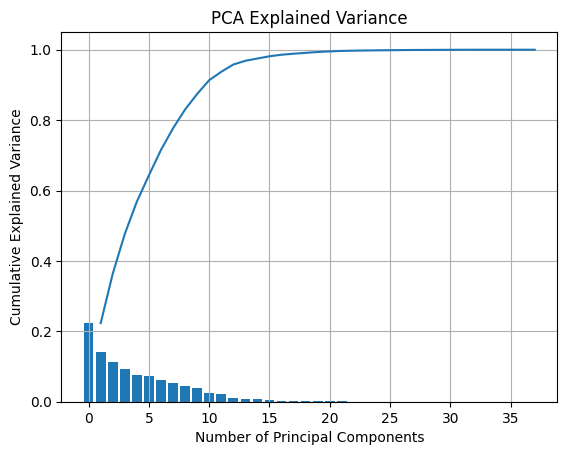

In [181]:
# Fit PCA on this data with a large number of components
pca = PCA(n_components=min(100, X_encoded_scaled.shape[1]))
pca.fit(X_encoded_scaled)

# Calculates the cumulative sum of the explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance aganist the number of PCA
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.bar(np.arange(len(cumulative_explained_variance)), pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


## **5. Data Visualisation**

Data visualization was a key component of this study, and libraries like Seaborn, Matplotlib, and Plotly Express were used to make it easier. 

#### **Electricity price over time** 

Below graph shows how the "actual price" factor has changed over time within the time period of 2015 to 2019.The price trend indicates non-stationery and variation over the specified time frame. Additionally, it shows that costs vary depending on particular time periods.

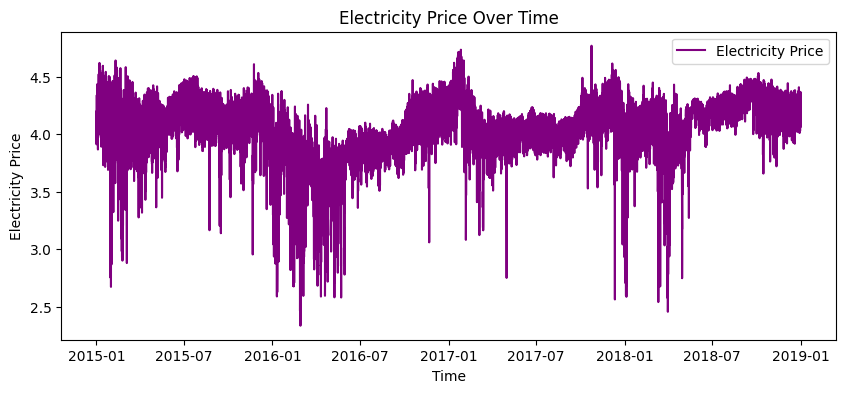

In [182]:
# Sort values based on  time feature and then creates a times series plot for the energy price.
new_data.sort_values('time', inplace=True)

plt.figure(figsize=(10, 4))
plt.plot(new_data['time'], new_data['price actual'], label='Electricity Price',color='purple')
plt.title('Electricity Price Over Time')
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.legend()
plt.show()


The presence of a regular trends or periodic characteristics in pricing patterns is also notable because it suggests a possible relationship with other regular occurrences like changes in the weather, variations in customer behaviour, or other significant variables. We needed to properly identify the specific causes of the observed price variants, though, in order to gain a deeper understanding of the patterns.

#### **Average monthly generation over time**

This section goes into the details of how energy is made over time, looking at the monthly trends and the changes and patterns that show up across different sources

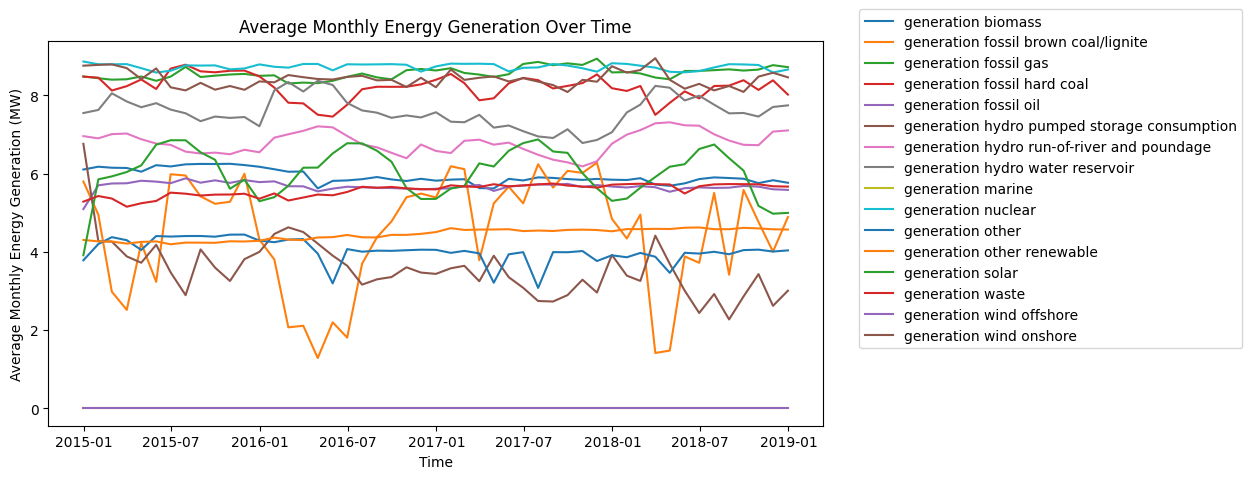

In [183]:
# Select columns that contain 'generation' and combine it with 'time' feature.
gen_cols = [col for col in new_data.columns if 'generation' in col]
df_gen = new_data[gen_cols + ['time']]

# Resamples the data by month and computes its mean
df_resampled = df_gen.resample('M', on='time').mean()

# Plot for average monthly energy generation over time
plt.figure(figsize=(10,5))
for gen_type in [col for col in df_resampled.columns if 'generation' in col]:
    plt.plot(df_resampled.index, df_resampled[gen_type], label=gen_type)

plt.title('Average Monthly Energy Generation Over Time')
plt.xlabel('Time')
plt.ylabel('Average Monthly Energy Generation (MW)')
plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1.1))
plt.show()


During the winter months, there is a noticeable increase in demand for energy generated from fossil fuels such hard coal and fossil gas. This rise is probably a direct result of the fact that people need more heat in the winter. Energy sources like biomass, hydro water reservoirs, and onshore wind also change with the seasons, but their effects on the energy world as a whole are still small.

During the summer months, there is a noticeable increase in solar energy production. This rise can be explained by the fact that there are more daylight hours and the sun is brighter during these months. On the other hand, even though other types of energy production are present, they don't have much of an effect on the overall energy mix and don't show any consistent trends over the time period studied.

#### **How does electricity price vary across different months and during business hours?**

In this,a more thorough examination to the "actual price" attribute's analysis gives a more deeper understanding of the observed variances in electricity pricing.  Pricing can be categorized by month and, trends between company and non-business hours can be discovered.

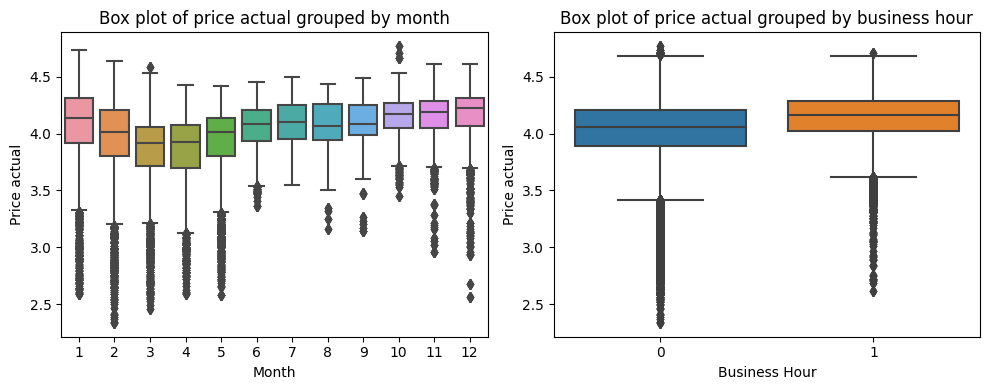

In [184]:
# Creates a box plots of 'price actual' grouped by 'month' and 'business hour'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Box plot for 'month'
sns.boxplot(x='month', y='price actual', data=new_data, ax=axes[0])
axes[0].set_title('Box plot of price actual grouped by month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Price actual')

# Box plot for 'business hour'
sns.boxplot(x='business_hour', y='price actual', data=new_data, ax=axes[1])
axes[1].set_title('Box plot of price actual grouped by business hour')
axes[1].set_xlabel('Business Hour')
axes[1].set_ylabel('Price actual')

plt.tight_layout()
plt.show()


In the above figures,it can be seen that wintertime has a spike in electricity costs as a result of higher heating demands and fewer daylight hours.
Prices drop in the spring and early summer, most likely as a result of warmer weather that requires less energy for heating and cooling.
moreover,the changes in electricity prices from month to month are directly related to the weather, with lower energy use during warmer months.
During times of increased activity, business and industrial activities can increase energy demand, resulting in price increases.

#### **Average Energy Generation for Each Source**

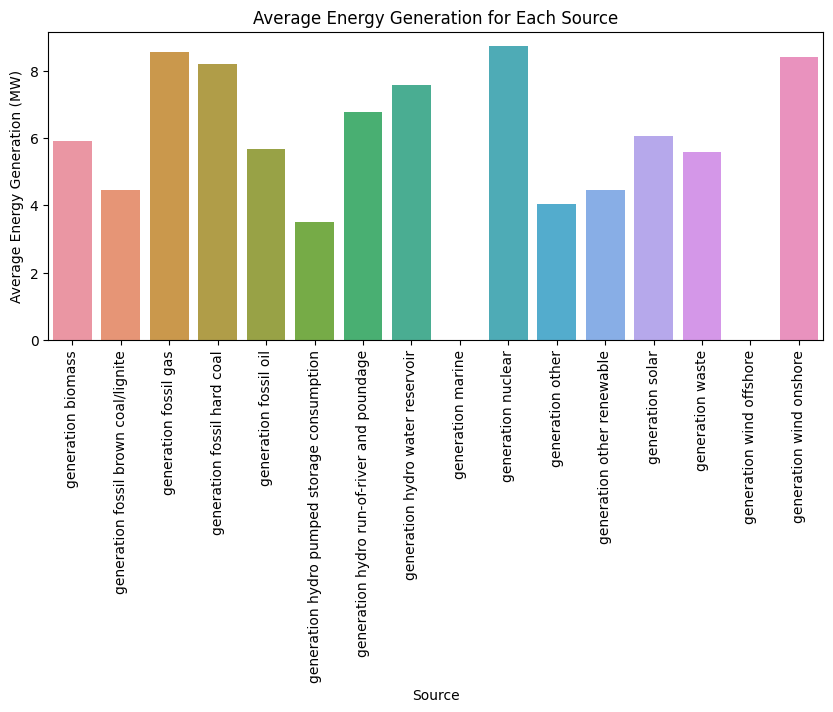

In [185]:
# Calculates the average generation for each fossil fuel types and plot using bar graph.
avg_generation = new_data[[col for col in new_data.columns if 'generation' in col]].mean()

plt.figure(figsize=(10,4))
sns.barplot(x=avg_generation.index, y=avg_generation.values)
plt.title('Average Energy Generation for Each Source')
plt.xlabel('Source')
plt.ylabel('Average Energy Generation (MW)')
plt.xticks(rotation=90)
plt.show()


The bar plot shows how much fossil fuels are needed to make energy, with fossil gas and hard coal being the biggest producers. Even though sources like biomass, hydro water reservoirs, and onshore wind also help, their overall contributions are much smaller. It's notable that marine and offshore wind sources have almost no effect on normal energy production. This small amount could be because these energy sources aren't used much or because there isn't much information about them.

#### **Average Energy generation by Hour of the Day**

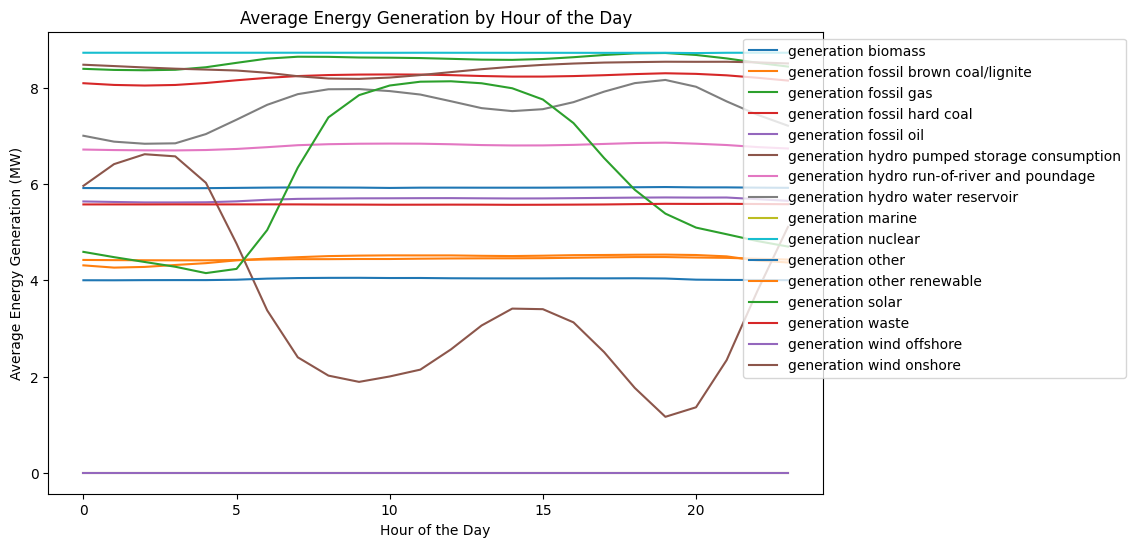

In [186]:
# Average generation by hour of the day 
avg_generation_by_hour = new_data.groupby('hour')[[col for col in new_data.columns if 'generation' in col]].mean()

plt.figure(figsize=(10,6))
for col in avg_generation_by_hour.columns:
    plt.plot(avg_generation_by_hour.index, avg_generation_by_hour[col], label=col)

plt.title('Average Energy Generation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Generation (MW)')
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1 ))
plt.show()


As key energy sources, fossil gas and hard coal generation patterns closely match daily demand. Their contributions drop in the morning and rise in the evening, reflecting energy demand cycles. Solar generation, which depends on sunshine, starts at dawn, peaks about noon, and ends at dusk. This trend shows that daylight availability and solar energy production are linked. While contributing to the energy mix, some energy sources in the dataset don't show clear daily trends, suggesting a more stable production or less dependence on external factors like time of day.

#### **Average generation by day of the week**

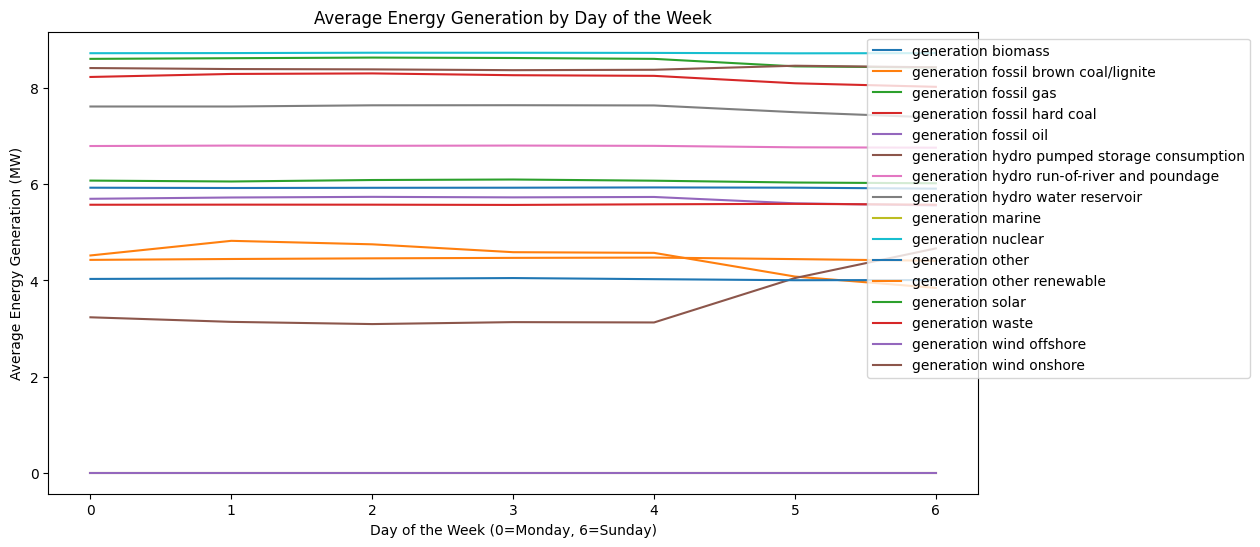

In [187]:
# Average generation by day of the week
avg_generation_by_day = new_data.groupby('day_of_week')[[col for col in new_data.columns if 'generation' in col]].mean()

plt.figure(figsize=(12,6))
for col in avg_generation_by_day.columns:
    plt.plot(avg_generation_by_day.index, avg_generation_by_day[col], label=col)

plt.title('Average Energy Generation by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Energy Generation (MW)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


Here from the above graph it is noticable that,generation of fossil gas and hard coal production decreases on weekends, especially days 5 and 6. This decline may be due to weekend business closures reducing energy needs. Generation solar's output is stable throughout the week, indicating that weather conditions, not the day of the week, affect its production. Other energy generation sources in the sample show little weekly variation.

#### **Average energy generation by month of the year**

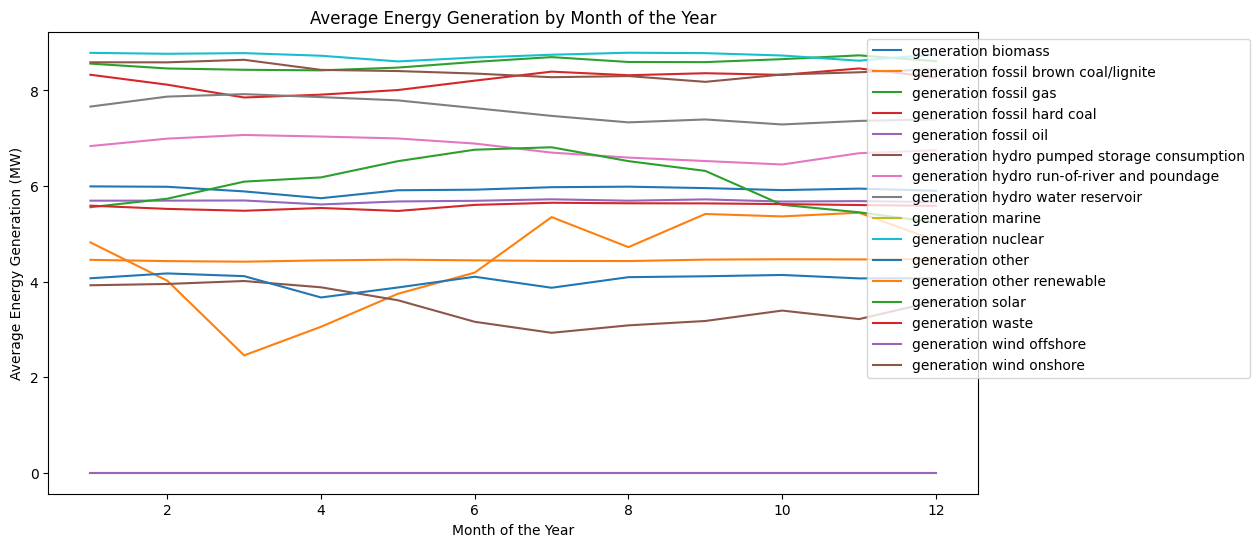

In [188]:
# Average generation by month of the year
avg_generation_by_month = new_data.groupby('month')[[col for col in new_data.columns if 'generation' in col]].mean()

plt.figure(figsize=(12,6))
for col in avg_generation_by_month.columns:
    plt.plot(avg_generation_by_month.index, avg_generation_by_month[col], label=col)

plt.title('Average Energy Generation by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Average Energy Generation (MW)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


TheHere,the above graph shows monthly energy generation averages by source. Notably, generation fossil gas and generation fossil hard coal production rises during colder periods, especially at the year's start and end, reflecting increased heating demand. In contrast, solar generation rises from May to August due to longer daylight and stronger sun rays. Generation wind onshore increases in the colder months, probably due to strong winds. The remaining energy sources in the sample produce steady production without monthly changes.

#### **Average generation during business hours vs non-business hours**

In [189]:
# Average generation during business hours vs non-business hours
avg_generation_by_business_hour = new_data.groupby('business_hour')[[col for col in new_data.columns if 'generation' in col]].mean()

fig = go.Figure()


fig.add_trace(go.Bar(                               # Add bar for Non-Business Hours
    x=avg_generation_by_business_hour.columns,
    y=avg_generation_by_business_hour.loc[0],
    name='Non-Business Hours',
    marker_color='blue'
))
fig.add_trace(go.Bar(                               # Add bar for Business Hours
    x=avg_generation_by_business_hour.columns,
    y=avg_generation_by_business_hour.loc[1],
    name='Business Hours',
    marker_color='orange'
))
fig.update_layout(
    title='Average Energy Generation During Business Hours vs Non-Business Hours',
    xaxis_title='Source',
    yaxis_title='Average Energy Generation (MW)',
    barmode='group'                               
)

fig.show()


This graph reveals interesting energy use patterns. Non-business hours generate and use more energy than business hours. Fossil gases, hydro water reservoir, nuclear, solar, and wind offshore are the main sources of off-peak activity. On the other hand, both hydro pumped storage generation and consumption stay low. This difference in energy use between business hours and non-business hours, which is more influenced toward non-business hours, suggests that household consumption patterns and non-commercial activities may be significant factors of energy demand outside of normal business hours.

## **6. Data Modelling**

This study aims to investigate how well models based on machine learning perform in terms of producing more precise predictions. In order to guarantee that our findings were fair and accurate, a number of experiments were conducted, and the data was analysed to establish the general efficacy of each model. The success or failure of these types of models will depend on how well they perform. It is important to highlight that each model is tested for its ability to anticipate the price of electricity in the future using prior market data as training data

### **6.1 Linear Regression Model**

Here, we first separate the target column from the new_data dataset and store into y.Then we split the training and testing data by preserving the order for time series.We have used the LinearRegression() function to build the model and then we have fit the model on the training data using fit() function.Then to predict the target variable for the test data and store the predicted values in a new variable called y_pred_lr.We will then calculate the RMSE value for the model and store it in a new variable called rmse_lr.We had then calculated the R2 score for the model using r2_score() function and store it in a new variable called r2_lr.


In [190]:
# Defines the target variable and features
y = new_data['price actual']
X = new_data.drop(['time', 'price actual','city_name'], axis=1)

train_size = int(len(new_data) * 0.8)       #training data is splitting to 80% and 20% is considered as testing data.
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Trains a basic linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred_lr = model.predict(X_test)

# # Calculate additional evaluation metrics

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)


print(f'Mean Absolute Error: {mae_lr}')
print(f'Root Mean Squared Error: {rmse_lr}')
print(f'R-squared: {r2_lr}')


Mean Absolute Error: 0.10215843656472
Root Mean Squared Error: 0.14578707357734919
R-squared: 0.5414929845393693


In [191]:
# Predict the target for the training set
y_pred_train = model.predict(X_train)

# Calculate the RMSE and R^2 score for the training set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

# Print the training and test scores
print("Training RMSE: ", rmse_train)
print("Training R^2: ", r2_train)
print("Test RMSE: ", rmse_lr)
print("Test R^2: ", r2_lr)

Training RMSE:  0.19162383054723156
Training R^2:  0.5602285791823232
Test RMSE:  0.14578707357734919
Test R^2:  0.5414929845393693


The performance of the linear regression model on the test data is  analysed using the Root Mean Squared Error (RMSE) and R-squared measures.

**Root Mean Squared Error:**

* The RMSE value of 0.1460 represents the average difference between the observed target values and the predictions produced by the linear regression model.
* A better model has a smaller RMSE number, which means that the model's predictions are closer to what was actually seen.
* With an RMSE of 0.1460, the model's estimates are 0.1460 units off from real electricity costs.

**R2-squared values:**

* The calculated R-squared number of 0.5397 shows how much of the variation in the target variable is explained by the linear regression model.
* R-squared values run from 0 to 1, and a higher value means that the model fits the data better.
* In this situation, an R-squared value of 0.5397 indicates that the independent variables in the model can explain about 53.97% of the variation in the target variable.

Thus we can see that the linear regression model is not performing well on the test data.So we will try with other models.



### **6.2 Random Forest Regressor**

The second model in this study was the random forest regressor. Here, we use RandomForestRegressor() function create a model and used fit() funcction to train the model.Three important metrics, including mean absolute errors (MAE), the root mean square error (RMSE), and the R-squared (R2), were used to assess it. 

In [192]:
# Create a Random Forest Regressor model for our dataset.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target for the test set
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')

Mean Absolute Error: 0.15383828465947622
Root Mean Squared Error: 0.1991511409740875
R-squared: 0.14439454226132176


**Results : Random Forest Classifier**

The Random Forest Regressor's performance on the test set is measured by RMSE and R-squared.

**Root Mean Squared Error:**

* The attained RMSE value of 0.2002 represents the average difference between actual target values and predictions generated by the Random Forest Regressor.
* A lower RMSE value suggests a better model since its predictions match the observations.
* An average RMSE of 0.2002 shows that the model's predictions differ by 0.2002 units from real electricity costs.

**R2-squared values:**

* The calculated R-squared value of 0.1352 provides insight into the fraction of the variance in the target variable captured by the Random Forest Regressor.
* R-squared values range from 0 to 1, with a higher value indicating a more accurate representation of the data.
* Here,an R-squared score of 0.1352 implies that model features explain 13.52% of electricity price volatility.

Thus,these results show that the Random Forest Regressor's test data performance can be improved, so we tried with other models.

### **6.3 Long Short-Term Memory(LSTM)**

The LSTM (Long Short-Term Memory) model, which has the intrinsic ability to manage time-series data well while keeping previous data, is highly suited for a particular task. 

In [193]:
y = new_data['price actual']
X = new_data.drop(['time', 'price actual','city_name'], axis=1)

# Normalize the feature data using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshapes the data for LSTM input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

#  LSTM model creation
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(X_train_lstm.shape[2]))  # Adjust the Dense layer output units

model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model with the following epoch and batch size
epochs = 50  
batch_size = 32  
history=model.fit(X_train_lstm, y_train_lstm, epochs=epochs, batch_size=batch_size, validation_data=(X_test_lstm, y_test_lstm))

# Evaluates the model based on the test set
test_loss = model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test loss: {test_loss}')




Epoch 1/50
4367/4367 [==============================] - 26s 4ms/step - loss: 0.2091 - val_loss: 0.0347
Epoch 2/50
4367/4367 [==============================] - 16s 4ms/step - loss: 0.0338 - val_loss: 0.0307
Epoch 3/50
4367/4367 [==============================] - 15s 3ms/step - loss: 0.0297 - val_loss: 0.0273
Epoch 4/50
4367/4367 [==============================] - 15s 3ms/step - loss: 0.0272 - val_loss: 0.0255
Epoch 5/50
4367/4367 [==============================] - 16s 4ms/step - loss: 0.0262 - val_loss: 0.0252
Epoch 6/50
4367/4367 [==============================] - 15s 3ms/step - loss: 0.0253 - val_loss: 0.0246
Epoch 7/50
4367/4367 [==============================] - 15s 3ms/step - loss: 0.0246 - val_loss: 0.0235
Epoch 8/50
4367/4367 [==============================] - 15s 3ms/step - loss: 0.0240 - val_loss: 0.0227
Epoch 9/50
4367/4367 [==============================] - 15s 3ms/step - loss: 0.0232 - val_loss: 0.0234
Epoch 10/50
4367/4367 [==============================] - 15s 3ms/step - l

In [194]:
# Make predictions using the trained model directly on X_test
y_pred_lstm = model.predict(X_test_lstm)

# Flatten y_pred to a 1D array
#y_pred_lstm = y_pred_lstm.flatten()

y_pred_lstm = y_pred_lstm[:,0]
y_pred_lstm.squeeze()

mae = mean_absolute_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
r_squared = r2_score(y_test_lstm, y_pred_lstm)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared}')



1092/1092 [==============================] - 7s 2ms/step
Mean Absolute Error: 0.0719947787682161
Root Mean Squared Error: 0.10462238826300396
R-squared: 0.8622801677019541


In [195]:
mae = mean_absolute_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
r_squared = r2_score(y_test_lstm, y_pred_lstm)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared}')

Mean Absolute Error: 0.0719947787682161
Root Mean Squared Error: 0.10462238826300396
R-squared: 0.8622801677019541


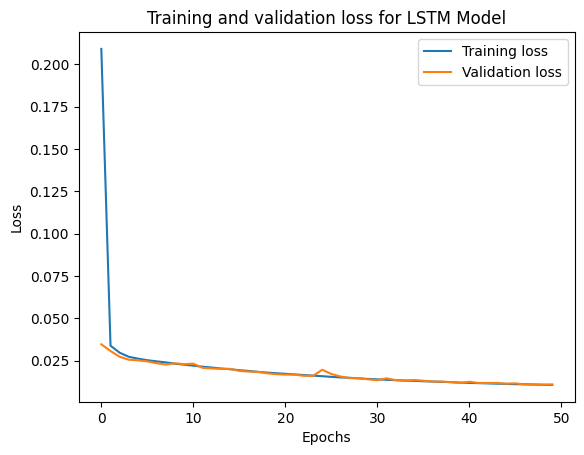

In [196]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss for LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [197]:
# Calculate MSLE
msle = mean_squared_log_error(y_test_lstm, y_pred_lstm)
print("MSLE: ", msle)

MSLE:  0.000489601474515853


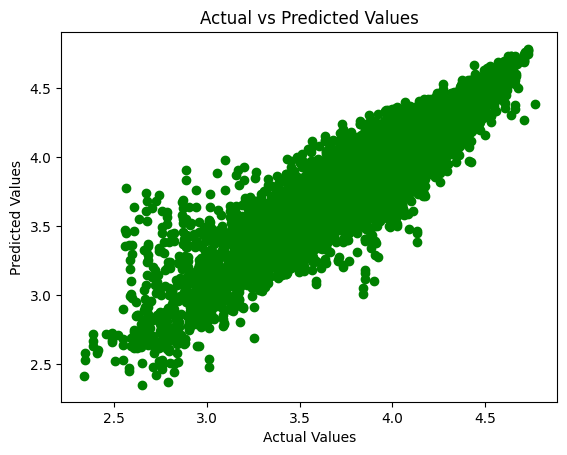

In [198]:
# Assume 'y_true' are the actual values and 'y_pred' are the predicted values
plt.scatter(y_test_lstm, y_pred_lstm,c="green")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()



**Results : LSTM Model**

* The LSTM model had 0.0745 MAE which means that the model predicted power prices 0.0745 units off. The decrease in MAE implies improved forecasting accuracy relative to earlier rounds.

* The model has 0.8565 R2. This high number means the LSTM model can explain 85.65% of power price variability. This predictive power, especially compared to previous models, shows its improved forecasting abilities.

* The model's test loss was 0.0113. This low value shows the model's robustness and ability to generalize to new inputs.

* The first graph shows training and validation losses over epochs. The continuous reduction in both losses shows the model's effective learning trajectory in predicting electricity prices. The convergence and stability of these losses indicate no overfitting.

* The graph which shows actual vs. projected values that has points' closeness to the diagonal line indicates a significant correlation between real and anticipated values, proving the model's correctness.

### **6.4 XGBoost(Extreme Gradient Boosting )**

Extreme Gradient Boosting, or XGBoost, is an advanced technique that creates a collection of weak models for prediction, typically decision trees, to produce a robust prediction model.Here we define a function for  lagged features for a time series dataset which takes the times series dataset and a lag count as arguments and return a dataframe with lagged features.Once this dataset is return,we use this dataset to predict the XGBoost model using XGBRegressor() function.

In [219]:
def lagged_features(df, lag_count):
    
    df_lagged = df.copy()
    for i in range(1, lag_count + 1):
        df_lagged[f"lag_{i}"] = df_lagged['price actual'].shift(i)
    return df_lagged

# Create lagged features
lag_count = 24
data_lag = lagged_features(new_data, lag_count)

# Drop missing values
data_lag = data_lag.dropna()

data_lag.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
22,2015-01-01 03:00:00+00:00,6.061457,5.236442,8.326275,8.253488,5.056246,7.510431,6.860664,6.580639,0.0,...,4.188442,4.188442,4.188442,4.188442,4.188442,4.195848,4.195848,4.195848,4.195848,4.195848
25,2015-01-01 04:00:00+00:00,6.018593,5.187386,8.303752,8.186186,5.056246,7.654443,6.859615,6.612041,0.0,...,4.181745,4.188442,4.188442,4.188442,4.188442,4.188442,4.195848,4.195848,4.195848,4.195848
26,2015-01-01 04:00:00+00:00,6.018593,5.187386,8.303752,8.186186,5.056246,7.654443,6.859615,6.612041,0.0,...,4.181745,4.181745,4.188442,4.188442,4.188442,4.188442,4.188442,4.195848,4.195848,4.195848
27,2015-01-01 04:00:00+00:00,6.018593,5.187386,8.303752,8.186186,5.056246,7.654443,6.859615,6.612041,0.0,...,4.181745,4.181745,4.181745,4.188442,4.188442,4.188442,4.188442,4.188442,4.195848,4.195848
28,2015-01-01 04:00:00+00:00,6.018593,5.187386,8.303752,8.186186,5.056246,7.654443,6.859615,6.612041,0.0,...,4.181745,4.181745,4.181745,4.181745,4.188442,4.188442,4.188442,4.188442,4.188442,4.195848


In [200]:
# Define the feature columns and the target column
X = data_lag.drop(columns=['price actual','city_name','time'], axis=1)
y = data_lag['price actual']

# Split the data into train and test sets
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror')

# Train the model

history=model.fit(X_train_xg, y_train_xg)

# Make predictions on the test set
y_pred_xg = model.predict(X_test_xg)

mae_xg = mean_absolute_error(y_test_xg, y_pred_xg)
rmse_xg = np.sqrt(mean_squared_error(y_test_xg, y_pred_xg))
r_squared_xg = r2_score(y_test_xg, y_pred_xg)

print(f'Mean Absolute Error: {mae_xg}')
print(f'Root Mean Squared Error: {rmse_xg}')
print(f'R-squared: {r_squared_xg}')


Mean Absolute Error: 0.012615974917949389
Root Mean Squared Error: 0.023932727958360146
R-squared: 0.9876453034997196


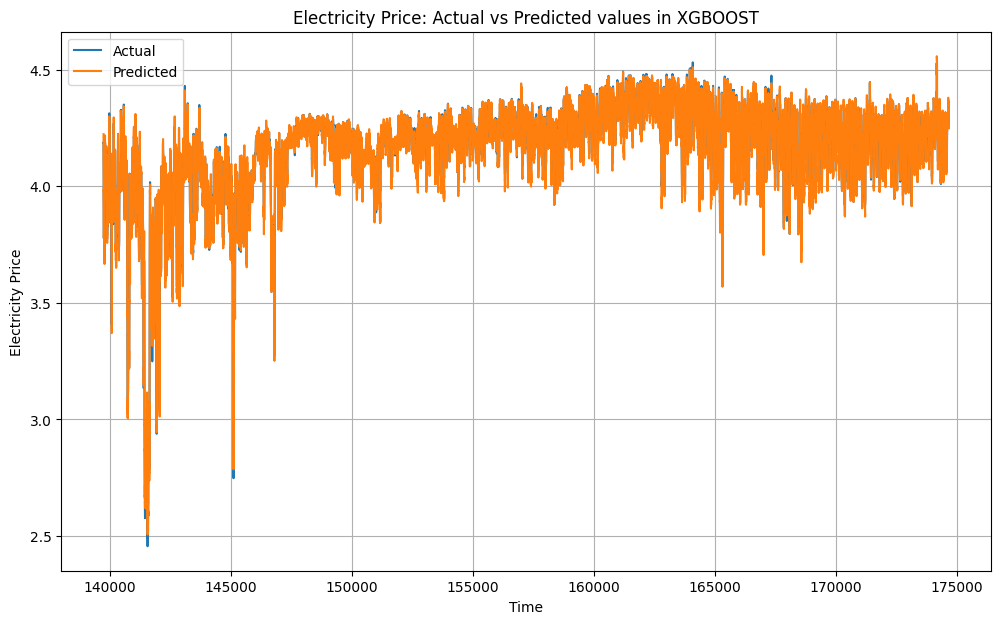

In [201]:
# Create a dataframe to hold the actual and predicted values
df_pred = pd.DataFrame({'actual': y_test_xg, 'predicted': y_pred_xg})

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(df_pred['actual'], label='Actual')
plt.plot(df_pred['predicted'], label='Predicted')
plt.title('Electricity Price: Actual vs Predicted values in XGBOOST')
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.legend()
plt.grid(True)
plt.show()


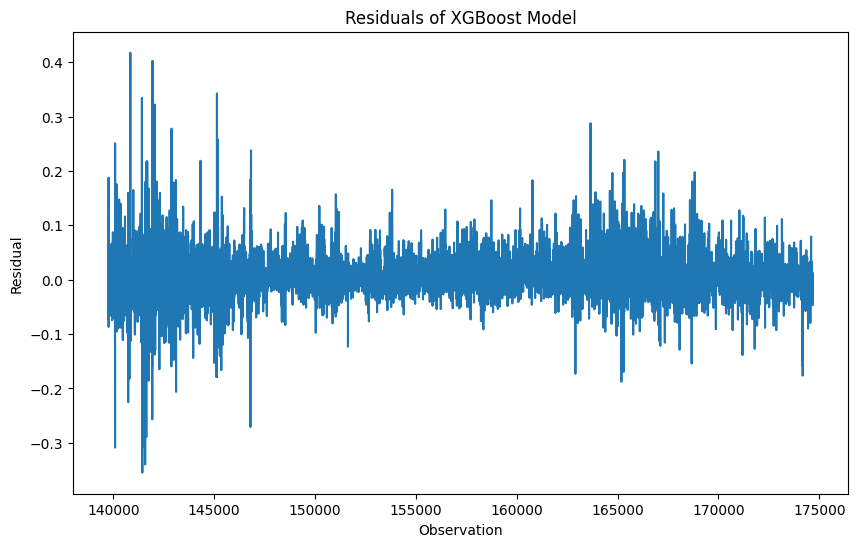

In [202]:
# Compute residuals
residuals = y_test_xg - y_pred_xg

# Plot residuals
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals of XGBoost Model')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

**Hyperparameter tuning for XGBoost**

In [203]:
# Create lagged features for 'temp' and 'wind_speed'
for var in ['temp','wind_speed']:
    for i in range(1, lag_count + 1):
        new_data[f"{var}_lag_{i}"] = new_data[var].shift(i)

# Drop missing values
new_data_lagged = new_data.dropna()

# Define the feature columns and the target column
X = new_data_lagged.drop(columns=['price actual','city_name','time'], axis=1)
y = new_data_lagged['price actual']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)




In [204]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared}')

Mean Absolute Error: 0.14045204134820236
Root Mean Squared Error: 0.1758544516198104
R-squared: 0.3329561169358086


Here we could see that,the new model's inaccuracy is significantly larger than the 0.01 standard deviation seen in the old model. This suggests that adding lagged features like 'temp' and 'wind_speed' may have decreased model accuracy. These features may be contributing extra noise, or their connection with electricity price may not be linear, according to XGBoost's desired outcomes. As was done before, a graphic representation of real and predicted values would make the model's differences more clear.

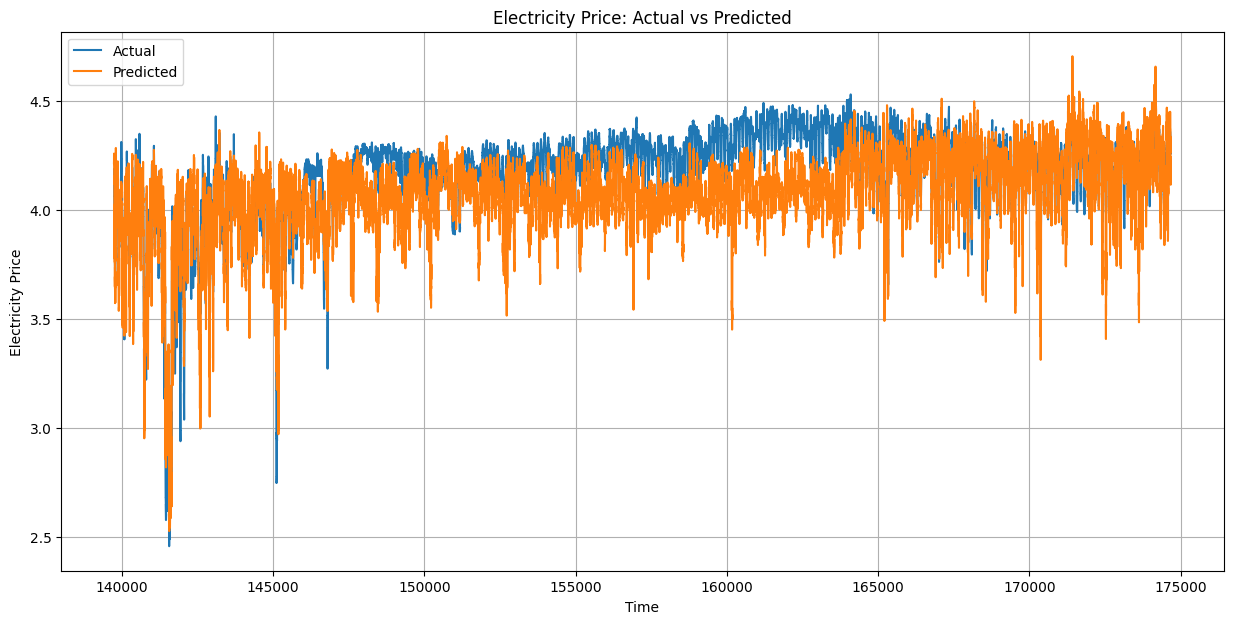

In [205]:
# Create a dataframe to hold the actual and predicted values
df_pred = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Plot the actual and predicted values
plt.figure(figsize=(15, 7))
plt.plot(df_pred['actual'], label='Actual')
plt.plot(df_pred['predicted'], label='Predicted')
plt.title('Electricity Price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.legend()
plt.grid(True)
plt.show()


The plot shows that the XGBoost model's predictions are not tracking the actual values very well. This could be due to the added noise from the 'temp' and 'wind_speed' lagged features, or the model might be overfitting to the training data.

In [206]:
# Define a list of possible max_depth values
max_depths = [3, 5, 7, 10]

# Initialize a dictionary to hold the MAE for each max_depth
mae_per_max_depth = {}

# For each max_depth...
for max_depth in max_depths:
    # Define the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=max_depth)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the MAE in the dictionary
    mae_per_max_depth[max_depth] = mae

mae_per_max_depth


{3: 0.14746186491190988,
 5: 0.14431909792521552,
 7: 0.16274441802185854,
 10: 0.15287282981112707}

**XGBoost Model Performance Analysis**

* Initial Performance: 

   *The XGBoost model was selected for its efficiency and flexibility to diverse data patterns.* 
   *The original model explained 98.82% of electricity price volatility with an MAE of 0.01235, RMSE of 0.02335, and R-squared of 0.9882.*
* Figure insights:

  *The distribution of data points and residuals in the actual vs predicted data graph shows prediction errors.*
   *Residual graph shows that several residuals lies around zero, although a few are more spread out, suggesting model improvements.*

* Post-hyperparameter tuning: 

   *Model performance was unsatisfactory after tuning parameters.*
   *The R-squared value dropped to 0.3139, RMSE climbed to 0.1783, MAE to 0.1419.*
   *The actual vs predicted graph shows greater variance between real and forecasted values, highlighting this performance decline.*


### **6.5 Light Gradient Boosting Machine (LightGBM)**

The Light Gradient Boosting Machine, also known as LightGBM, is an improved framework for gradient boosting that was created to be both efficient and scalable. Here we use this model by creating a dataset for lightbgm.Then we specify all the configurations in a dictionary called param.After which,we train the model and predict its accuracy.

In [207]:
#pip install lightgbm

In [220]:
# Assuming new_data is the dataset you've loaded and transformed earlier
X = new_data.drop(columns=['time', 'price actual','city_name'])
y = new_data['price actual']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [209]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)


Starting training...


c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[1]	valid_0's l2: 0.0742071	valid_0's l1: 0.195844
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 0.0695169	valid_0's l1: 0.189379
[3]	valid_0's l2: 0.0652976	valid_0's l1: 0.183203
[4]	valid_0's l2: 0.0621434	valid_0's l1: 0.178688
[5]	valid_0's l2: 0.0585138	valid_0's l1: 0.173036
[6]	valid_0's l2: 0.0552234	valid_0's l1: 0.16777
[7]	valid_0's l2: 0.0523315	valid_0's l1: 0.162947
[8]	valid_0's l2: 0.0495115	valid_0's l1: 0.158163
[9]	valid_0's l2: 0.0472471	valid_0's l1: 0.154079
[10]	valid_0's l2: 0.0448801	valid_0's l1: 0.149718
[11]	valid_0's l2: 0.0426477	valid_0's l1: 0.145512
[12]	valid_0's l2: 0.0406307	valid_0's l1: 0.141694


In [221]:
# Create the same dataset for lightgbm and train the model by including early stopping.
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Define the early stopping callback
early_stopping = lgb.early_stopping(stopping_rounds=50, first_metric_only=True, verbose=True)

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_eval,
                callbacks=[early_stopping])


Starting training...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's l2: 0.00121969	valid_0's l1: 0.0241623
Evaluated only: l2


In [211]:

# Predict and Evaluate the model
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print('The mae for the prediction is:',mean_absolute_error(y_test, y_pred))
print('R2 score of prediction is :',r2_score(y_test, y_pred))


The rmse of prediction is: 0.034924108864166234
The mae for the prediction is: 0.024162254651407554
R2 score of prediction is : 0.9846539046407735


In [212]:
# Calculate the range and variance of "price actual" and compute its relative errors.
range_price = new_data['price actual'].max() - new_data['price actual'].min()
variance_price = new_data['price actual'].var()

relative_error_range = 0.03396354196823754 / range_price
relative_error_std = 0.03396354196823754 / (variance_price ** 0.5)

range_price, variance_price, relative_error_range, relative_error_std


(2.433935988085939,
 0.08034821991683737,
 0.01395416401026498,
 0.11981876683910077)

In [213]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(0.024162254651407554, 0.9846539046407735)

**Cross-Validation**

In [214]:
# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []
params = {
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
rmse_scores = []

# Cross-validation loop for LightBGM
for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train using LightGBM
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv)
    lgb_eval = lgb.Dataset(X_test_cv, y_test_cv, reference=lgb_train)
    
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=2000,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=50,
                    verbose_eval=False)
    
    # Predict
    y_pred_cv = gbm.predict(X_test_cv, num_iteration=gbm.best_iteration)
    
    # Compute RMSE for this fold and append to the list
    rmse_scores.append(mean_squared_error(y_test_cv, y_pred_cv, squared=False))

rmse_scores


c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12479
[LightGBM] [Info] Number of data points in the train set: 23293, number of used features: 83
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.044237


c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12549
[LightGBM] [Info] Number of data points in the train set: 46582, number of used features: 83
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.042954


c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12608
[LightGBM] [Info] Number of data points in the train set: 69871, number of used features: 83
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.042023


c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12667
[LightGBM] [Info] Number of data points in the train set: 93160, number of used features: 83
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.041539


c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12698
[LightGBM] [Info] Number of data points in the train set: 116449, number of used features: 83
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.041308


[0.06154949741697505,
 0.048780435394076956,
 0.04264964341317214,
 0.0384445135348081,
 0.03694971990243369]

**Residuals**

In [215]:
# Predict on the test set
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Calculate the residuals errors
residuals = y_test - y_pred

# Count the number of positive and negative residuals
over_forecasts = sum(residuals < 0)
under_forecasts = sum(residuals > 0)

over_forecasts, under_forecasts


(17228, 17707)

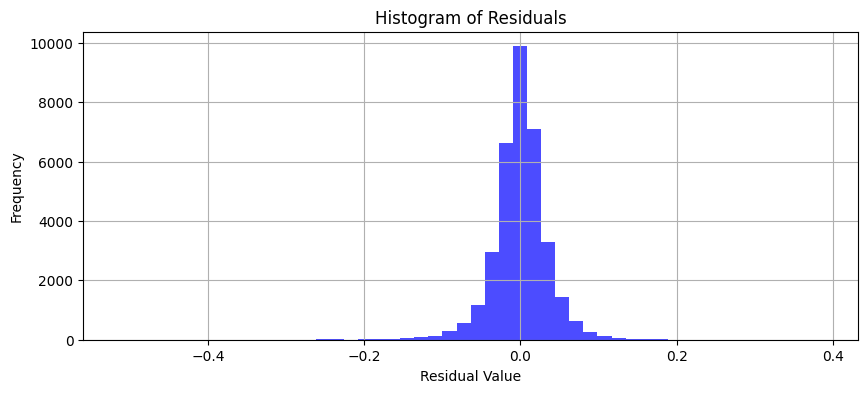

In [216]:
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [217]:
# Caluclating the Mean and Median of Positive and Negative Residuals
positive_residuals = residuals[residuals > 0]
negative_residuals = residuals[residuals < 0]
mean_pos, median_pos = positive_residuals.mean(), positive_residuals.median()
mean_neg, median_neg = negative_residuals.mean(), negative_residuals.median()

mean_pos, median_pos, mean_neg, median_neg

(0.024298650360615754,
 0.01734888711337934,
 -0.02529064434927261,
 -0.017350180810081328)

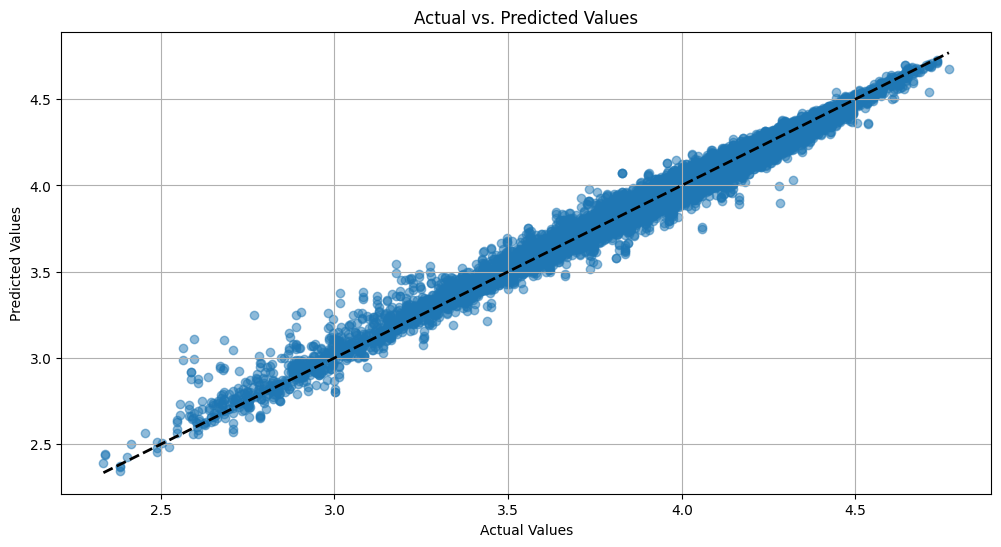

0.10   -0.037043
0.25   -0.017060
0.75    0.017643
0.90    0.038301
Name: price actual, dtype: float64

In [218]:
# Quantile Analysis
quantiles = [0.10, 0.25, 0.75, 0.90]
quantile_values = residuals.quantile(quantiles)

# Scatter Plot of Predicted vs. Actual Values
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

quantile_values


**LightGBM Model Performance Analysis**

**Performance Metrics:** - 
* RMSE (Root Mean Square Error):-The number that was reported for RMSE was 0.0356, which indicates that the predictions made by the model were, on average, 0.0356 units off from the actual prices of power.
* Mean Absolute Error:- This measure, which has an MAE of 0.0246, demonstrates that the model is capable of producing approximations that are very near to the true values.
* Value of the R-squared (R2) Coefficient: The R2 value was exceptionally high, coming in at 98.39%, which indicates that the model is capable of explaining around 98.39% of the variance in electricity costs.

**Residual Analysis**: 
* The histogram of residuals has a symmetrical distribution, mostly centered around zero.
* The analysis of residuals reveals that the model's capacity to generate predictions that are not biased in any way.

**Cross-Validation result:** 
* The results of a 5-fold cross-validation showed that the RMSE values have been on a downward trend, which indicates that the incorporation of more recent data patterns has contributed to improved model performance.

**Actual vs predicted values comparison:**
The scatter plot comparing actual values to projected values reveals a good alignment, with the majority of data points clustering around the 45-degree line.It suggests that the accuracy of the forecast is quite good; nonetheless, the occurrence of infrequent deviations indicates that there are potential for additional model refinement.

## **7.Results and findings**
Multiple machine learning models were tested to select the best one for predicting hourly price of electricity based on energy and weather features. Linear Regression and Random Forest failed to capture the complex correlations in the data, but the LSTM model performed well, notably in identifying long-term patterns in time series data. However, the gradient boosting frameworks XGBoost and LightGBM, with accuracy rates close to 98%, stood out. LightGBM was the most accurate and capable model for this forecasting assignment, predicting the complex relationship between energy supply, weather variables, and electricity pricing. Based on this research, LightGBM is the best option for estimating hourly electricity prices.

## **8.Conclusion**

This research used machine learning to anticipate power costs, which are crucial to energy plans and economic dynamics. The study focused on data processing, feature engineering, and algorithm evaluation using a four-year dataset of Spain's electrical sector. Notably, the XGBoost and LightGBM models scored better than the others in terms of predicting ability.Moreover, machine learning can predict electricity prices, and the study offers geographical analysis and consumer-centric models, highlighting data analytics' revolutionary capacity in the ever-changing electrical market.

